## Question 1

### (a) Is the following statement true: 

>We can directly discard a training sample if the value of the sample’s output variable Y is missing, for whatever training dataset. And this will not make any difference to the parameter learning of the Naive Bayes model.

The statement is correct. With the Naive Bayes algorithm, we are interested in estimating either the probabilities of the output (in which case the missing data is not relevant) or the probabilities of a set of features conditioned to the output, in which cases the missing output is also not relevant.

### (b)  What is your estimate of the following probabilities from the training data?

For $P(Y=0)$ we can find that from a frequency table, that is, we simply count the number of occurances by the total number of observations. There are 4 observations where Y=0, and 12 in total. Hence, $P(Y=0) = \frac{4}{12} =  0.33$

$P(X_1 = 0|Y=1)$. Now, we are limiting our total space to the observations where $Y=1$ and both $X_1, Y$ are not missing. From these samples, we find what is the frequency that $X_1 = 0$. We have only 1 such sample, 10, out of 
$$\hat{p_{11}} = \frac{\# X_1^{(i)} = 0, Y^{(i)}=1,\ both\ not\ missing,\ i=1, ...., m}{\# Y^{(i)}=1,\ both\ not\ missing,\ i=1, ...., m}$$

$$P(X_1 = 0|Y=1) = \frac{2}{7} = 0.2857$$

$P(Y = 0|X_3=1)$.

$$\hat{p_{01}} = \frac{\# X_3^{(i)} = 1, Y^{(i)}=0,\ both\ not\ missing,\ i=1, ...., m}{\# X_3^{(i)}=1,\ both\ not\ missing,\ i=1, ...., m}$$

$$P(Y = 0|X_3=1) = \frac{1}{7} = 0.1428$$


### (c) What is the predicted class?

In order to predict the next class, we apply Bayes' algorithm to find the probability that the observation belongs to each class. Then, we compare the probabilities and select the one with the highest. We have:

$$P(Y=C_j∣X_1=x_1,...,X_p=x_p)∝P(Y=C_j)\prod_{i=1}^pP(X_i=x_i∣Y=C_j)$$


From the frequency tables, we find that:

$$P(X_1=0∣Y=1) = \frac{2}{7} = 0.2857$$
$$P(X_1=1∣Y=1) = \frac{5}{7} = 0.7142$$
$$P(X_1=0∣Y=0) = \frac{2}{4} = 0.5$$
$$P(X_1=1∣Y=0) = \frac{2}{4} = 0.5$$

$$P(X_2=0∣Y=1) = \frac{6}{7} = 0.8571$$
$$P(X_2=1∣Y=1) = \frac{1}{7} = 0.1428$$
$$P(X_2=0∣Y=0) = \frac{1}{4} = 0.25$$
$$P(X_2=1∣Y=0) = \frac{3}{4} = 0.75$$

$$P(X_3=0∣Y=1) = \frac{2}{8} = 0.25$$
$$P(X_3=1∣Y=1) = \frac{6}{8} = 0.75$$
$$P(X_3=0∣Y=0) = \frac{2}{3} = 0.6666$$
$$P(X_3=1∣Y=0) = \frac{1}{3} = 0.3333$$

$$P(Y = 0) = \frac{4}{12} = 0.3333$$
$$P(Y=1) = \frac{8}{12} = 0.6666$$

Therefore, for Y = 0, we have:

$$P(Y=0∣X_1=x_1,...,X_p=x_p)∝ 0.0034722$$
$$P(Y=1∣X_1=x_1,...,X_p=x_p)∝ 0.0031233$$

Thus, we would predict the class of $Y_12$ to be 0.


## Question 2

Now, we will look int the implementation of descent algorithms for a linear regression problem. We start by importandind the data and normalizing the features, with the exception of the intercept term


In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
from numpy.linalg import inv
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Loading data
data = np.load("individual_data.npy")

# Separating the features and outpus
X = data[:,:-1]
y = data[:,-1].reshape(-1,1)

# Initializing the standard scaler
scaler = StandardScaler()

# Fitting the non-intercept features of X
X[:,1:] = scaler.fit_transform(X[:,1:])

### (a) Compute optimal $\theta$

The optimal solution occurs where the loss function is minimized:

$$min_\theta \sum^m_{i=1}(Y^{(i)} - \theta^TX^{(i)})^2$$

We can derive the analytical solution for this minimization problem as follows:

Let $J(\theta)$ be the cost function of the linear regression model. In the vectorized form it can be written as:

$$J(\theta) = (y - X\theta)^T(y - X\theta)$$

We can rearrage this formula to be:

$$J(\theta) = ((X\theta)^T - y^T)(X\theta - y)$$

Expanding the multiplication, we get:

$$J(\theta) = (X\theta)^T(X\theta) - (X\theta)^Ty - y^T(X\theta) + y^Ty$$

We observe that the second term $(X\theta)^Ty$ is a scalar. Hence, its transpose is equal to itself. With that, we make the following substitution:

**Second term transposed**
$$((X\theta)^Ty)^T = y^T(X\theta)$$

Replacing it back in the previous function, we obtain:

$$J(\theta) = (X\theta)^T(X\theta) - 2y^T(X\theta) + y^Ty$$

The minimum of this function will occur where the first order gradient is zero (for a linear regression function). Hence, we find the derivative of J with respect to $\theta$:

**Partial derivatives necessary to find $J(\theta)$**
$$\frac{\partial{(AX)}}{\partial{X}} = A^T$$
$$\frac{\partial{(X^TA)}}{\partial{X}} = A$$
$$\frac{\partial{(X^TX)}}{\partial{X}} = 2X$$
$$\frac{\partial{(X^TAX)}}{\partial{X}} = AX + A^TX$$

Hence, $J(\theta)$ becomes:

$$\frac{\partial{J(\theta)}}{\partial{\theta}} = X^TX\theta + X^TX\theta - 2X^Ty = 2X^TX\theta - 2X^Ty$$

Minimizing, we get:

$$0 = 2X^TX\theta - 2X^Ty$$

We can simplify this as:

$$X^TX\theta = X^Ty$$

**and finally:**

$$\theta = (X^TX)^{-1}X^Ty$$

Which can be implemented using Numpy as below:

In [2]:
# Finding optimal theta vector analytically
theta_star = inv(X.T.dot(X)).dot(X.T).dot(y)

print("The optimal theta vector is:\n {}".format(theta_star))

The optimal theta vector is:
 [[-43.71142069]
 [ -0.84742866]
 [  4.98453636]
 [ 11.26975094]
 [ -1.07163277]
 [ 55.60868186]]


### (b) Implementing gradient descent

Let the cost function (MSE) can be defined as:

$$J(\theta) = \frac{1}{m} \sum_{i=1}^m(Y_i - \hat{Y_1})^2$$

We have shown in (a) that the gradient of this cost function is

$$\nabla f(x) = -\frac{\partial J}{\partial \theta} = -2X(y - \theta X)$$

We define this gradient function below

In [3]:
# define gradient function 
def grad_f(x):
    return 2*X.transpose().dot(X).dot(x)-2*X.transpose().dot(y)

Our algorithm becomes:

1. **Step 1**: Initialize $\theta$ as a vector of zeroes of shape dim(X)
2. **Step 2**: Define $\theta^{(t)} = \theta^{(t-1)} - \eta \nabla f(\theta^{(t-1)})$
3. **Step 3**: Check stop condition. If $\sqrt{(\theta_t - \theta^*)^2} \lt \epsilon$, we stop, otherwise, move on. Where $\theta_t$ is the theta vector at the current iteration and $\theta^*$ is the optimal analytical solution calculated in question 2 a.
4. **Step 3**: Update t = t+1 (i.e: go to the next t). Go back to step 2.

We define the error function as:

In [4]:
#Define error function
def err(x):
    return np.linalg.norm(x- theta_star)

The we can define the algorithm as:

In [5]:
# gradient descent algorithm
def grad_descent(x_0, eta, thres):
    x_t = x_0
    errors = []
    error = thres + 1
    t = 1
    while error > thres:
        # gradient update step
        x_new = x_t - eta*grad_f(x_t)
        x_t = x_new
        error = err(x_t)
        errors.append(err(x_t))
        t +=1
    return x_t, errors, t

In [16]:
# Initializing theta_0 as zeroes
x_0 = np.zeros([6,1])

# Parameters from the question
eta = 0.001
thres = 10**(-3)

# Get gradient descent for eta = 0.001
x_final, grad_errors, steps = grad_descent(x_0, eta, thres)

Next, we plot the error as a function of the step t, and analyse the convergence of the algorithm.

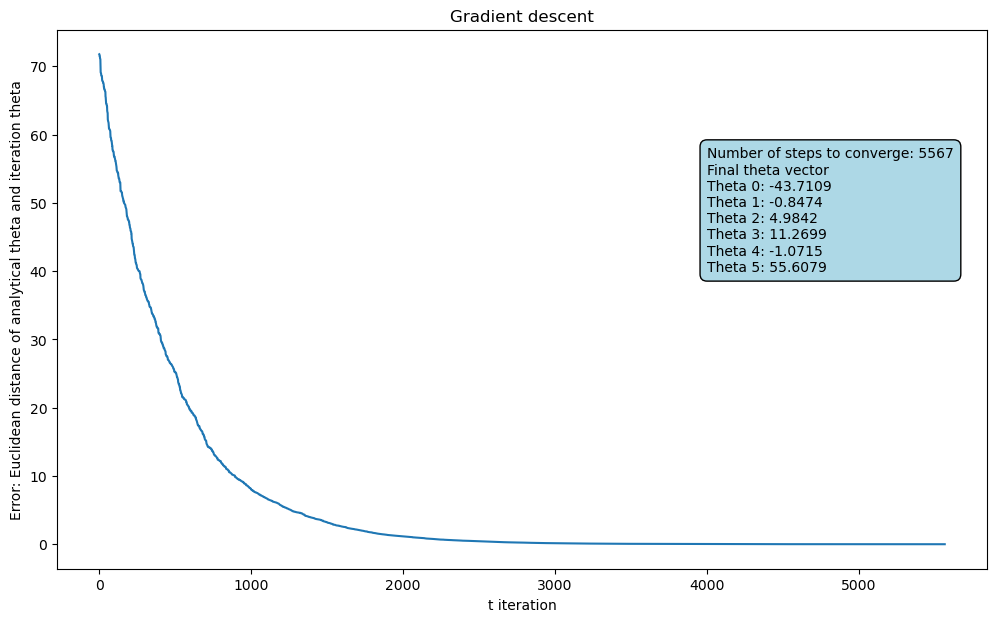

In [17]:
# plot the loss value of each iteration
fig = plt.figure(figsize=(12,7))
plt.plot(grad_errors)
plt.title("Gradient descent")
plt.xlabel("t iteration")
plt.ylabel("Error: Euclidean distance of analytical theta and iteration theta")

#Define plot text
text = """Number of steps to converge: {}\nFinal theta vector\nTheta 0: {}
Theta 1: {}
Theta 2: {}
Theta 3: {}
Theta 4: {}
Theta 5: {}""".format(steps, round(x_final[0][0],4),
                                        round(x_final[1][0],4),
                                        round(x_final[2][0],4),
                      round(x_final[3][0],4),
                      round(x_final[4][0],4),
                      round(x_final[5][0],4))

plt.annotate(text, (4000,40),
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', edgecolor='black'))


plt.show()

### (c) Newton's method

Newton's method follows the same principle as gradient descent. While gradient descent only considers the first-order derivative of the function, Newton’s method considers the second. Since derivating is a computationally expensive task, each iteration of Newton’s method takes longer than the gradient descent, but it can converge much faster.

So Newton's method can be described as:


1. **Step 1**: Initialize $\theta$ as a vector of zeroes of shape dim(X)
2. **Step 2**: Define $g_t = -\nabla^2 f (\theta^{(t-1)})^{-1} \nabla  f(\theta^{(t-1)})$
3. **Step 3**: Define $\theta^{(t)} = \theta^{(t-1)} + g_t$
3. **Step 4**: Check stop condition. If $\sqrt{(\theta_t - \theta^*)^2} \lt \epsilon$, we stop, otherwise, move on. Where $\theta_t$ is the theta vector at the current iteration and $\theta^*$ is the optimal analytical solution calculated in question 2 a.
4. **Step 5**: Update t = t+1 (i.e: go to the next t). Go back to step 2.



The term

$$\nabla^2 f (\theta)$$

Is known as the Hessian matrix of f(x). We can implemented using numpy as follows:

In [8]:
# define functions
def Hessian_f(x):
    return 2*X.transpose().dot(X)

Then, Newton's method becomes:

In [9]:
# Newton's method algorithm
def Newton(x_0, eta, thres):
    x_t = x_0
    errors = []
    error = thres + 1
    steps = 1
    while error > thres:
        # update step
        x_new = x_t - eta*inv(Hessian_f(x_t)).dot(grad_f(x_t))
        error = err(x_t)
        errors.append(error)
        x_t = x_new
        steps +=1
    return x_t, errors, steps

In [18]:
# Initializing theta_0 as zeroes
x_0 = np.zeros([6,1])

# Parameters from the question
eta = 20
thres = 10**(-3)

# Get gradient descent for eta = 20
x_final, newton_errors, steps = Newton(x_0, eta, thres)

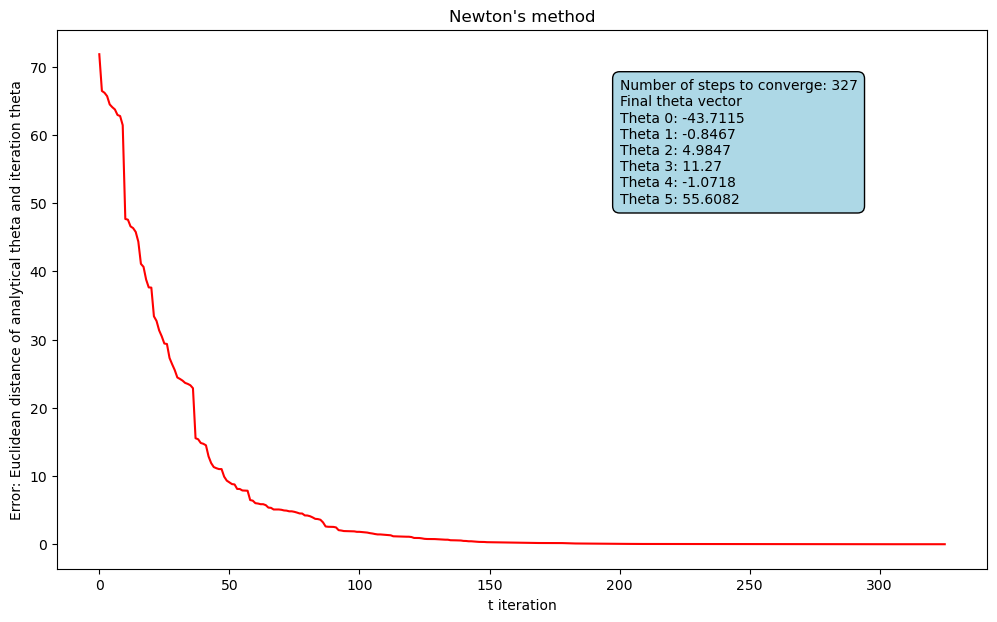

In [19]:
# plot the loss value of each iteration
fig = plt.figure(figsize=(12,7))
plt.plot(newton_errors, c='red')
plt.title("Newton's method")
plt.xlabel("t iteration")
plt.ylabel("Error: Euclidean distance of analytical theta and iteration theta")

#Define plot text
text = """Number of steps to converge: {}\nFinal theta vector\nTheta 0: {}
Theta 1: {}
Theta 2: {}
Theta 3: {}
Theta 4: {}
Theta 5: {}""".format(steps, round(x_final[0][0],4),
                                        round(x_final[1][0],4),
                                        round(x_final[2][0],4),
                      round(x_final[3][0],4),
                      round(x_final[4][0],4),
                      round(x_final[5][0],4))

plt.annotate(text, (200,50),
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', edgecolor='black'))

plt.show()

### (d) Stochastic gradient descent

Recall that to compute the gradient or Hessian matrix, we need to iterate through all of m observations, which can be very inefficient. The approach of the stochastic gradient descent is to compute the gradient descent algorithm for a sample of randomly selected observations, instead of for the entire set.

The algorithm is as follows:

1. **Step 1**: We start from some $\theta^{(0)}$
2. **Step 2**: Randomly select an index $i'$
3. **Step 3**: Compute the direction $g_t = \nabla_\theta l(f_\theta (X^{(i')},Y^{(i')})$ 
4. **Step 4**: We update $\theta^t = \theta^{(t-1)} + \eta g_t$
5. **Step 5**: Check stop condition. If $\sqrt{(\theta_t - \theta^*)^2} \lt \epsilon$, we stop, otherwise, move on. Where $\theta_t$ is the theta vector at the current iteration and $\theta^*$ is the optimal analytical solution calculated in question 2 a.
6. **Step 6**: Update t = t+1 (i.e: go to the next t). Go back to step 2.

Therefore, we make a simple adjustment to the first-order gradient function we have been using: 

In [12]:
# define gradient function 
def grad_f(x):
    global X, y
    i_sample = np.random.choice(X.shape[0], 1)
    return 2*X[i_sample,:].transpose().dot(X[i_sample,:]).dot(x)-2*X[i_sample,:].transpose().dot(y[i_sample])

In [13]:
# gradient descent algorithm
def SGD(x_0, eta, thres):
    x_t = x_0
    errors = []
    t = 1
    error = thres + 1
    while error > thres:
        # SGD update step
        x_new = x_t - eta*grad_f(x_t)
        error = err(x_t)
        errors.append(error)
        x_t = x_new
        t +=1
    return x_t, errors, t

In [14]:
# Initializing theta_0 as zeroes
x_0 = np.zeros([6,1])

# Parameters from the question
eta = 0.1
thres = 10**(-3)

# Get gradient descent for eta = 20
x_final, sgd_errors, steps = SGD(x_0, eta, thres)

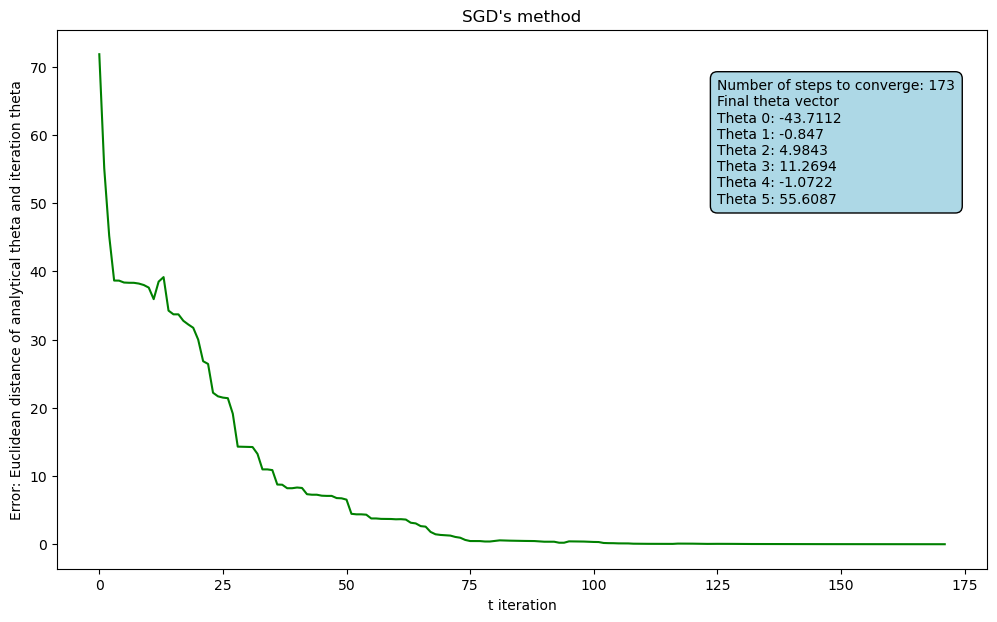

In [15]:
# plot the loss value of each iteration
fig = plt.figure(figsize=(12,7))

plt.plot(sgd_errors, c='green')
plt.title("SGD's method")
plt.xlabel("t iteration")
plt.ylabel("Error: Euclidean distance of analytical theta and iteration theta")

#Define plot text
text = """Number of steps to converge: {}\nFinal theta vector\nTheta 0: {}
Theta 1: {}
Theta 2: {}
Theta 3: {}
Theta 4: {}
Theta 5: {}""".format(steps, round(x_final[0][0],4),
                                        round(x_final[1][0],4),
                                        round(x_final[2][0],4),
                      round(x_final[3][0],4),
                      round(x_final[4][0],4),
                      round(x_final[5][0],4))

plt.annotate(text, (125,50),
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', edgecolor='black'))

plt.show()

### (e) Observations on the convergence

By comparing the convergence of the three algorithms, we see that gradient descent took the most iterations to converge. This is somewhat expected, since it iterates through all of the observations before moving to the next step. As a result, it converges at a lower pace, but in a more constant manner. Newton's method, on the other hand, converges in much fewer steps. This is expected, since we are using Hessian's matrix in the step as well as the first-order gradient. Although the computational cost of Newton's method is higher, the number of steps required to converge is lower. Finally, when looking at the stochastic curve, it has the fastest conversion and a significantly lower compuntional cost than Newton's. So for this dataset, this is definetely the best method. However, we can that the path to convergence of SGD is much noisier than that of gradient descent. This is due the approximations made in this algorithm, which are not calculating the exact gradient, but only that based on a sample of observations.